# ===========================
# Benchmarking
### Correlation Coefficients of Global layout/Spring layout to Network Distance
# ===========================

In [2]:
from multidimvis_main import *

_________
_________
# 2D EVALULATION
_________
_________

## GRAPHS

### TOYMODELS

In [2]:
################################################
#
# C A Y L E Y T R E E 
#
################################################

organism = 'tree'
n = 1093
r = 3
G = nx.full_rary_tree(r,n)


# NETWORK DISTANCE

dist_network = {}
for a in nx.shortest_path_length(G):
    for n,spl in a[1].items():
        dist_network[(a[0],n)] = spl

In [26]:
################################################
#
# C U B E G R I D
#
################################################

organism = 'grid'

G = nx.grid_graph([10,10,10],periodic=False)


# NETWORK DISTANCE

dist_network = {}
for a in nx.shortest_path_length(G):
    for n,spl in a[1].items():
        dist_network[(a[0],n)] = spl

In [553]:
################################################
#
# T O R U S L A T T I C E 
#
################################################

organism = 'torus'

G = nx.grid_2d_graph(44,22,periodic=True)


# NETWORK DISTANCE

dist_network = {}
for a in nx.shortest_path_length(G):
    for n,spl in a[1].items():
        dist_network[(a[0],n)] = spl

### CURRENT NETWORK 

In [577]:
print('Network:', organism)
print('Number of nodes: %s' %len(list(G.nodes())))
print('Number of edges: %s' %len(list(G.edges())))
print('Network density: %.11f%%' %(200.*len(list(G.edges()))/(len(list(G.nodes()))*len(list(G.nodes()))-1)))

Network: grid
Number of nodes: 1000
Number of edges: 2700
Network density: 0.54000054000%


___________
## DIAGRAM (network distance, spring, global layout)
___________

In [514]:
%%time
# GLOBAL LAYOUT 

#-----------------------------
# UMAP PARAMETERS:
#-----------------------------
n_neighbors = 20
spread = 1
min_dist = 0.0
metric = 'cosine'
lnr = 1
nep = None

feature = 'RWRvis'
r = .9
alpha = 1.0

A = nx.adjacency_matrix(G)
FM_m_array = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))
DM_rwr  = pd.DataFrame(FM_m_array)

umap_rwr = embed_umap_2D(DM_rwr, n_neighbors, spread, min_dist, metric, learn_rate = lnr, n_ep = nep)
posG_umap_rwr = get_posG_2D(list(G.nodes()), umap_rwr)

CPU times: user 15.3 s, sys: 766 ms, total: 16.1 s
Wall time: 17.4 s


In [515]:
# NORMALIZED COORDINATES FOR CORRELATION CALCULATION 

posG_complete_umap_rwr = {key:posG_umap_rwr[key] for key in G.nodes()}
df_posG = pd.DataFrame(posG_complete_umap_rwr).T
x = df_posG.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_posG_norm = pd.DataFrame(x_scaled)
posG_complete_umap_rwr_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values)))

posG = posG_complete_umap_rwr_norm

dist_layout2D = {} 
for p1,p2 in it.combinations(G.nodes(),2):
    #dist_layout2D[(p1,p2)] = (posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2
    dist_layout2D[(p1,p2)] = np.sqrt((posG[p1][0]-posG[p2][0])**2+(posG[p1][1]-posG[p2][1])**2)
    
dist_network_mod = {}
for j,m in dist_network.items():
    if j in dist_layout2D.keys():
        dist_network_mod[j]=float(m)
        
d_plot_layout = {}
for spldist in range(1,int(max(dist_network_mod.values()))+1):
    l_s = []
    for k, v in dist_network_mod.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        dxy = dist_layout2D[nodes]
        l_xy.append(dxy)
    d_plot_layout[spldist] = l_xy
    
# GLOBAL RWR Pearson Correlation
l_medians_layout = []
for k, v in d_plot_layout.items():
    l_medians_layout.append(statistics.median(v))
    
x = np.array(range(1,int(max(dist_network_mod.values()))+1))
y = np.array(l_medians_layout)
r_layout = np.corrcoef(x, y)

print('GLOBAL (RWR) Pearson Correlation Factor: ', r_layout[0][1])

GLOBAL (RWR) Pearson Correlation Factor:  0.9727336103109648


In [522]:
%%time 

# SPRING LAYOUT
itr = 200

posG_spring2D = nx.spring_layout(G, iterations = itr, dim = 2)

CPU times: user 17.4 s, sys: 126 ms, total: 17.5 s
Wall time: 17.7 s


In [523]:
# NORMALIZED COORDINATES FOR CORRELATION CALCULATION 

df_posG = pd.DataFrame(posG_spring2D).T
x = df_posG.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_posG_norm = pd.DataFrame(x_scaled)
posG_spring2D_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values)))

posG = posG_spring2D_norm
dist_spring2D = {} 
for p1,p2 in it.combinations(G.nodes(),2):
    #dist_spring2D[(p1,p2)] = (posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2
    dist_spring2D[(p1,p2)] = np.sqrt((posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2)
    
d_plot_spring = {}
for spldist in range(1,int(max(dist_network_mod.values()))+1):
    l_s = []
    for k, v in dist_network_mod.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_spring2D[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_spring[spldist] = l_xy
    
# SPRING Pearson Correlation
l_medians_spring = []
for k, v in d_plot_spring.items():
    l_medians_spring.append(statistics.median(v))
    
x = np.array(range(1,int(max(dist_network_mod.values()))+1))
y = np.array(l_medians_spring)
r_spring = np.corrcoef(x, y)

print('SPRING Pearson Correlation Factor: ', r_spring[0][1])

SPRING Pearson Correlation Factor:  0.9644454562982463


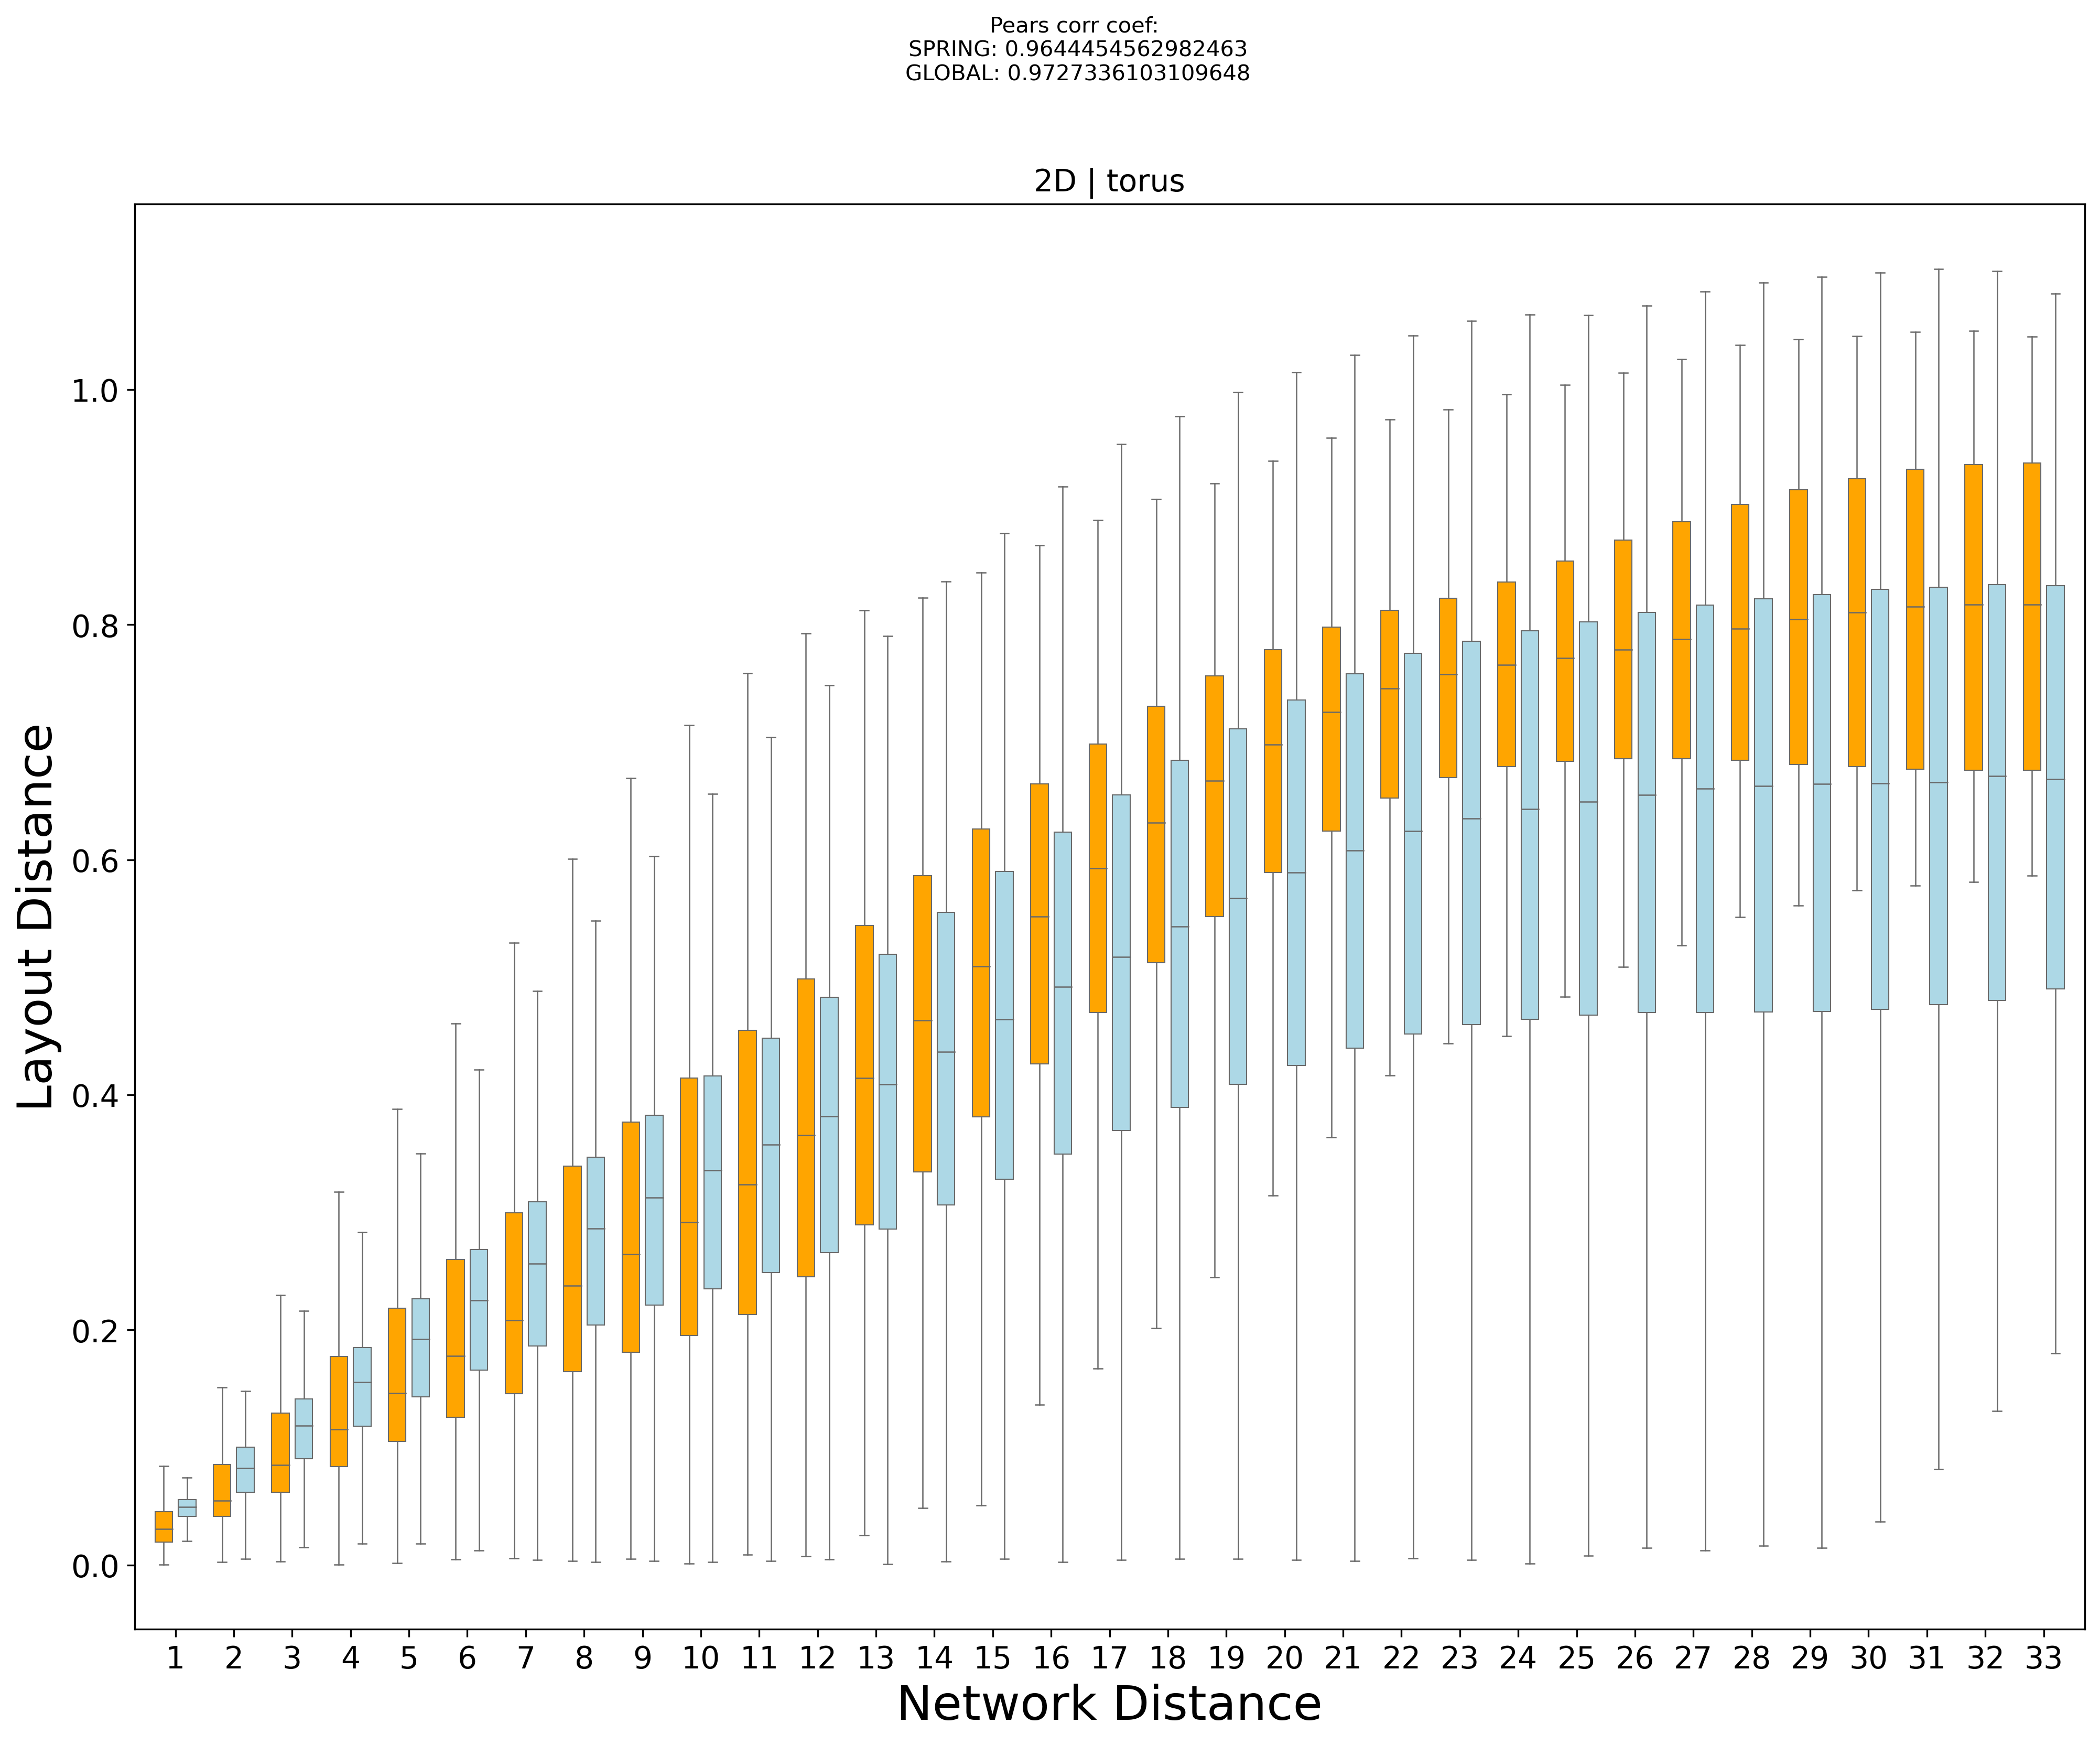

In [524]:
offset = 0.2 

fig, ax = plt.subplots(figsize =(16,12), dpi=300)
bp_spring = ax.boxplot(d_plot_spring.values(), positions=[i+offset for i in list(d_plot_spring.keys())], widths=0.3, patch_artist=True, showfliers=False)
bp_layout = ax.boxplot(d_plot_layout.values(), positions=[i-offset for i in list(d_plot_layout.keys())], widths=0.3, patch_artist=True, showfliers=False)

for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp_spring[element], color='dimgrey', linewidth=0.6)
    plt.setp(bp_layout[element], color='dimgrey', linewidth=0.6)

for patch in bp_spring['boxes']:
    patch.set(facecolor='lightblue', linewidth=0.5)
    
for patch in bp_layout['boxes']:
    patch.set(facecolor='orange', linewidth=0.5)

plt.xlabel('Network Distance', fontsize=22)
plt.ylabel('Layout Distance', fontsize=22)

plt.xticks(range(1,len(d_plot_spring.keys())+1),d_plot_spring.keys(), fontsize=14)
plt.yticks(fontsize=14)


plt.title('2D | '+organism, fontsize=14)
plt.suptitle('Pears corr coef: '+'\n'+'SPRING: '+str(r_spring[0][1])+'\n'+ 'GLOBAL: '+str(r_layout[0][1]), fontsize=10)

plt.show()
fig.savefig('output_plots/benchmark/2Dtoynetwork_NetworkDistances_'+'springitr'+str(itr)+'_'+organism+'.png')

# --------------

_________
_________
# 3D EVALULATION
_________
_________

### PPI (human/yeast)

In [ ]:
################################################
#
# H U M A N 
#
################################################

organism = 'Human'

G = nx.read_edgelist('input/ppi_elist.txt',data=False)

#######################
#
# NETWORK DISTANCE PRECALCULATED 
# 
#######################

DM_spl_prec_human = pd.read_csv('_output_csv/SPL_Dataframe_Human.csv', index_col=0)
DM_spl_prec_human.index = list(G.nodes())
DM_spl_prec_human.columns = list(G.nodes())
print('reading done')

d_DM_spl = DM_spl_prec_human.to_dict()
print('dataframe to dict done')

d_SPL_pairs = {}
for k,d in d_DM_spl.items():
    for n,v in d.items():
        d_SPL_pairs[k,n]=v

print('dict done')
dist_network = d_SPL_pairs
del DM_spl_prec_human

reading done
dataframe to dict done


In [480]:
################################################
#
# Y E A S T 
#
################################################

organism = 'Yeast'

data = pickle.load( open( "input/BIOGRID-ORGANISM-Saccharomyces_cerevisiae_S288c-3.5.185.mitab.pickle", "rb" ) )

filter_score = data[
                    #(data['Interaction Types'] == 'psi-mi:"MI:0915"(physical association)') +
                    (data['Interaction Types'] == 'psi-mi:"MI:0407"(direct interaction)') 
                    #&
                    #(data['Taxid Interactor A'] == "taxid:559292") & 
                    #(data['Taxid Interactor B'] == "taxid:559292") 
]

g = nx.from_pandas_edgelist(filter_score, '#ID Interactor A', 'ID Interactor B')
g.remove_edges_from(nx.selfloop_edges(g)) #remove self loop

G_cere = g.subgraph(max(nx.connected_components(g), key=len)) # largest connected component (lcc)
G = G_cere
    
#######################
#
# NETWORK DISTANCE PRECALCULATED 
# 
#######################

DM_spl_prec_yeast = pd.read_csv('_output_csv/SPL_Dataframe_Yeast.csv', index_col=0)
DM_spl_prec_yeast.index = list(G.nodes())
DM_spl_prec_yeast.columns = list(G.nodes())

d_DM_spl = DM_spl_prec_yeast.to_dict()

d_SPL_pairs = {}
for k,d in d_DM_spl.items():
    for n,v in d.items():
        d_SPL_pairs[k,n]=v

dist_network = d_SPL_pairs

### CURRENT NETWORK 

In [ ]:
print('Network:', organism)
print('Number of nodes: %s' %len(list(G.nodes())))
print('Number of edges: %s' %len(list(G.edges())))
print('Network density: %.11f%%' %(200.*len(list(G.edges()))/(len(list(G.nodes()))*len(list(G.nodes()))-1)))

___________
## DIAGRAM (network distance, spring, global layout)
___________

In [36]:
%%time

# GLOBAL LAYOUT 

#-----------------------------
# UMAP PARAMETERS:
#-----------------------------
n_neighbors = 20
spread = 1
min_dist = 0.0
metric = 'cosine'
lnr = 1
nep = None

feature = 'RWRvis'
r = .9
alpha = 1.0

A = nx.adjacency_matrix(G)
FM_m_array = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))
DM_rwr = pd.DataFrame(FM_m_array).T

umap_rwr_3D = embed_umap_3D(DM_rwr, n_neighbors, spread, min_dist, metric)
posG_3Dumap_rwr = get_posG_3D(list(G.nodes()), umap_rwr_3D)

del DM_rwr

CPU times: user 11min 48s, sys: 3min 58s, total: 15min 46s
Wall time: 13min 36s


In [37]:
# NORMALIZED COORDINATES FOR CORRELATION CALCULATION 

posG_3D_complete_umap_rwr = {key:posG_3Dumap_rwr[key] for key in G.nodes()}

print('normalize coordinates')
df_posG = pd.DataFrame(posG_3D_complete_umap_rwr).T
x = df_posG.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_posG_norm = pd.DataFrame(x_scaled)
posG_3D_complete_umap_rwr_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values,df_posG_norm[2].values)))

print('get layout distances')
posG = posG_3D_complete_umap_rwr_norm

dist_layout3D = {} 
for p1,p2 in it.combinations(G.nodes(),2):
    dist_layout3D[(p1,p2)] = np.sqrt((posG[p1][0]-posG[p2][0])**2+(posG[p1][1]-posG[p2][1])**2+(posG[p1][2]-posG[p2][2])**2)

normalize coordinates
normalization done
get layout distances


In [ ]:
d_plot_layout = {}
for spldist in range(1,int(max(dist_network.values()))+1):
    l_s = []
    for k, v in dist_network.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        if nodes in dist_layout3D.keys():
            dxy = dist_layout3D[nodes]
            l_xy.append(dxy)
    d_plot_layout[spldist] = l_xy

print('prep layout distances done')

# GLOBAL RWR Pearson Correlation
l_medians_layout = []
for k, v in d_plot_layout.items():
    l_medians_layout.append(statistics.median(v))
    
x = np.array(range(1,int(max(dist_network.values()))+1))
y = np.array(l_medians_layout)
r_layout = np.corrcoef(x, y)

print('GLOBAL (RWR) Pearson Correlation Factor: ', r_layout[0][1])

### SPRING

In [ ]:
%%time 

# SPRING LAYOUT
itr = 10

posG_spring3D = nx.spring_layout(G, iterations = itr, dim = 3)

In [ ]:
# NORMALIZED COORDINATES FOR CORRELATION CALCULATION 

df_posG = pd.DataFrame(posG_spring3D).T
x = df_posG.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_posG_norm = pd.DataFrame(x_scaled)
posG_spring3D_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values, df_posG_norm[2].values)))

posG = posG_spring3D_norm
dist_spring3D = {} 
for p1,p2 in it.combinations(G.nodes(),2):
    #dist_spring2D[(p1,p2)] = (posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2
    dist_spring3D[(p1,p2)] = np.sqrt((posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2+(posG[p1][2]-posG[p2][2])**2)
    
d_plot_spring = {}
for spldist in range(1,int(max(dist_network.values()))+1):
    l_s = []
    for k, v in dist_network.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        if nodes in dist_spring3D.keys():
            dxy = dist_spring3D[nodes]
            l_xy.append(dxy)
    d_plot_spring[spldist] = l_xy
    
# SPRING Pearson Correlation
l_medians_spring = []
for k, v in d_plot_spring.items():
    l_medians_spring.append(statistics.median(v))
    
x = np.array(range(1,int(max(dist_network_mod.values()))+1))
y = np.array(l_medians_spring)
r_spring = np.corrcoef(x, y)

print('SPRING Pearson Correlation Factor: ', r_spring[0][1])

In [ ]:
offset = 0.2 

fig, ax = plt.subplots(figsize =(16,12), dpi=300)
bp_spring = ax.boxplot(d_plot_spring.values(), positions=[i+offset for i in list(d_plot_spring.keys())], widths=0.3, patch_artist=True, showfliers=False)
bp_layout = ax.boxplot(d_plot_layout.values(), positions=[i-offset for i in list(d_plot_layout.keys())], widths=0.3, patch_artist=True, showfliers=False)

for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp_spring[element], color='dimgrey', linewidth=0.6)
    plt.setp(bp_layout[element], color='dimgrey', linewidth=0.6)

for patch in bp_spring['boxes']:
    patch.set(facecolor='lightblue', linewidth=0.5)
    
for patch in bp_layout['boxes']:
    patch.set(facecolor='orange', linewidth=0.5)

plt.xlabel('Network Distance', fontsize=22)
plt.ylabel('Layout Distance', fontsize=22)

plt.xticks(range(1,len(d_plot_spring.keys())+1),d_plot_spring.keys(), fontsize=14)
plt.yticks(fontsize=14)


plt.title('3D | '+organism, fontsize=14)
plt.suptitle('Pears corr coef: '+'\n'+'SPRING: '+str(r_spring[0][1])+'\n'+ 'GLOBAL: '+str(r_layout[0][1]), fontsize=10)

plt.show()
fig.savefig('output_plots/benchmark/3Dtoynetwork_NetworkDistances_'+'springitr'+str(itr)+'_'+organism+'.png')